# **토익 진단평가 데이터 다듬기**
# 단계1 : 데이터 전처리
 * 이번 시간에는 파이썬을 활용한 AI모델링에서 전처리에 대해 실습해보겠습니다.
 * 전처리란 데이터 분석을 수행하기 전에 데이터를 적절한 형태로 가공하는 과정을 말합니다. 
 * 머신러닝과 AI모델링에서 60~70% 차지하는 부분이 바로 전처리 파트입니다.
 * 굉장히 시간과 노력이 많이 투입되며, 어려운 부분일 수 있습니다.
 * 데이터의 이상치나 결측치를 제거하거나, 변수를 수치형으로 변환하거나, 표준화나 정규화를 적용하는 등의 작업이 있습니다.
 * 데이터가 깨끗이 정리되지 않으면 머신러닝/AI 성능을 장담할 수 없습니다.
 * 데이터 전처리에 심혈을 기울여주시기 바라며, 이론보다 실습이 더 많은 시간과 노력이 투자되어야 합니다.

## 0.미션 확인

* 개요
    * 응시할 토익점수를 예측해주는 모델을 생성하기 위한 데이터를 전처리하려고 합니다.
    * 이를 위해 주어진 데이터는 응시자별 3회차씩의 토익점수와 당시 학습방식 등의 정보 입니다.
    * 관련 토익점수 및 학습정보 데이터를 분석하여 미니프로젝트 1차 이후에 예측 모델을 개발하여 
      토익 응시생들에게 도움이 되는 솔루션을 개발하려고 합니다.
* 전처리 단계 목표
    * 3회차(3행)의 데이터를 하나의 분석단위(1행)로 만들기 위해 응시자별 데이터를 집계합니다.
    * 응시자는 하나의 ID로 구분됩니다.
    * 응시회차는 seq로 구분됩니다. 모든 응시자가 1,2,3 의 회차 값을 갖고 있습니다.
* 학습목차
    0) 미션 내용 확인
    1) 환경설정 : 라이브러리 불러오기 및 파일 읽어오기
    2) 데이터프레임 탐색
    3) 데이터 전처리 수행 (불필요 컬럼 삭제, Null 처리, 중복값 제거, 한 행으로 합치기 등)
    4) 결과 저장하기

## 1.환경설정

### (1) 라이브러리 불러오기

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드를 작성해주세요.
    - 필요하다고 판단되는 라이브러리를 추가하겠습니다.

In [1]:
#[문제] pandas, numpy 라이브러리를 임포트하세요.

In [1]:
import pandas as pd
import numpy as np

### (2) 데이터 불러오기
* 읽어올 데이터 파일
    * 학습 데이터 : data04.xls
    * 엑셀 파일이므로 pd.read_excel 함수를 이용해서 불러 옵니다.
* 다음과 같이 데이터를 불러와주세요.
    * 주피터랩 실행
        * 제공된 압축파일 '미프 1차_토익'을 다운받아 압축을 해제합니다.
        * anaconda의 root directory(C:\Users\<ID>) 에 '미프 1차_토익' 폴더를 만들고, 복사합니다.
        * '1.전처리_교육생용'과 '2.데이터_탐색_교육생용' 실습 파일을 열어주세요.

#### 1) 주피터랩 실행
* '미프 1차_토익' 폴더에 필요한 파일들을 넣고, 본 파일을 열거나, 별도 경로를 지정해서 데이터를 읽어올 수 있습니다.

In [3]:
#[문제] '미프 1차_토익' 폴더에서 본 파일인 '1.전처리_교육생용'을 열어주세요.

#### 2) 데이터 읽어오기

In [4]:
#[문제] data04.xlsx 파일을 Pandas read_excel 함수를 이용하여 읽고 data변수에 저장하세요.

In [2]:
# 읽어들일 파일명 : data04.xlsx 
# Pandas read_excel 함수 활용
# 결과 : data 저장
data = pd.read_excel('data04.xlsx')
file = 'data04.xlsx'

In [6]:
#[문제] 읽어온 데이터프레임을 확인하고, 상위 10개 행만 보여주세요.

In [4]:
data.head(10)

,ID,Seq,Gender,Birth_Year,LC_Score,RC_Score,Total Score,학습목표,학습방법,강의 학습 교재 유형,학습빈도,기출문제 공부 횟수,취약분야 인지 여부,토익 모의테스트 횟수,Student ID
0,1,1,M,1973,181,173,354,자기계발,참고서,일반적인 영어 텍스트 기반 교재,주3-4회,6.0,알고 있지 않음,6,student1
1,1,2,M,1973,227,213,440,자기계발,오프라인강의,뉴스/이슈 기반 교재,주1-2회,3.0,알고 있음,5,student1
2,1,3,M,1973,345,336,681,승진,온라인강의,영상 교재,주5-6회,7.0,알고 있음,10,student1
3,2,1,F,1982,330,290,620,자기계발,오프라인강의,뉴스/이슈 기반 교재,매일(주 7회),8.0,알고 있지 않음,19,student2
4,2,2,F,1982,354,339,693,승진,온라인강의,영상 교재,주5-6회,2.0,알고 있음,15,student2
5,2,3,F,1982,380,368,748,승진,온라인강의,뉴스/이슈 기반 교재,주5-6회,4.0,알고 있음,14,student2
6,3,1,F,1995,367,309,676,취업,온라인강의,영상 교재,매일(주 7회),9.0,알고 있지 않음,7,student3
7,3,2,F,1995,396,365,761,자기계발,온라인강의,영상 교재,주3-4회,7.0,알고 있지 않음,6,student3
8,3,3,F,1995,416,382,798,자기계발,참고서,일반적인 영어 텍스트 기반 교재,주1-2회,4.0,알고 있음,4,student3
9,4,1,M,1987,470,285,755,자기계발,온라인강의,뉴스/이슈 기반 교재,주1-2회,7.0,알고 있지 않음,4,student4


### 2. 데이터프레임 탐색

* **세부 요구사항**
    - data의 형태, 기초통계량, 정보 등을 확인합니다.
    - 특히 .info() 를 통해서 각 변수별 데이터타입이 적절한지 확인합니다.
    - 다양한 함수로 데이터를 탐색해주세요.

In [7]:
#[문제] 전체 데이터의 행,열 개수를 확인하기

In [6]:
data.shape

(1500, 15)

In [8]:
#[문제] 전체 데이터의 하위 5개 행 확인하기

In [8]:
data.tail()

,ID,Seq,Gender,Birth_Year,LC_Score,RC_Score,Total Score,학습목표,학습방법,강의 학습 교재 유형,학습빈도,기출문제 공부 횟수,취약분야 인지 여부,토익 모의테스트 횟수,Student ID
1495,499,2,F,1990,378,326,704,승진,온라인강의,뉴스/이슈 기반 교재,주5-6회,6.0,알고 있지 않음,12,student499
1496,499,3,F,1990,422,370,792,자기계발,오프라인강의,비즈니스 시뮬레이션(Role Play),주3-4회,4.0,알고 있음,7,student499
1497,500,1,M,1984,169,188,357,자기계발,참고서,일반적인 영어 텍스트 기반 교재,주3-4회,8.0,알고 있지 않음,2,student500
1498,500,2,M,1984,172,190,362,자기계발,참고서,뉴스/이슈 기반 교재,매일(주 7회),10.0,알고 있음,16,student500
1499,500,3,M,1984,235,226,461,승진,오프라인강의,비즈니스 시뮬레이션(Role Play),주5-6회,7.0,알고 있음,15,student500


In [9]:
#[문제] 전체 데이터의 모든 변수 확인하기

In [9]:
data.columns

Index(['ID', 'Seq', 'Gender', 'Birth_Year', 'LC_Score', 'RC_Score',
       'Total Score', '학습목표', '학습방법', '강의 학습 교재 유형', '학습빈도', '기출문제 공부 횟수',
       '취약분야 인지 여부', '토익 모의테스트 횟수', 'Student ID'],
      dtype='object')

In [10]:
#[문제] 전체 데이터 정보 확인

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1500 non-null   int64  
 1   Seq          1500 non-null   int64  
 2   Gender       1500 non-null   object 
 3   Birth_Year   1500 non-null   int64  
 4   LC_Score     1500 non-null   int64  
 5   RC_Score     1500 non-null   int64  
 6   Total Score  1500 non-null   int64  
 7   학습목표         1500 non-null   object 
 8   학습방법         1500 non-null   object 
 9   강의 학습 교재 유형  1500 non-null   object 
 10  학습빈도         1500 non-null   object 
 11  기출문제 공부 횟수   1497 non-null   float64
 12  취약분야 인지 여부   1500 non-null   object 
 13  토익 모의테스트 횟수  1500 non-null   int64  
 14  Student ID   1500 non-null   object 
dtypes: float64(1), int64(7), object(7)
memory usage: 175.9+ KB


In [11]:
#[문제] 각 열별 Null 데이터 값의 개수를 확인해주세요.

In [12]:
data.isna().sum()

ID             0
Seq            0
Gender         0
Birth_Year     0
LC_Score       0
RC_Score       0
Total Score    0
학습목표           0
학습방법           0
강의 학습 교재 유형    0
학습빈도           0
기출문제 공부 횟수     3
취약분야 인지 여부     0
토익 모의테스트 횟수    0
Student ID     0
dtype: int64

In [12]:
#[문제] 데이터의 통계정보를 확인해주세요.

In [13]:
data.describe()

,ID,Seq,Birth_Year,LC_Score,RC_Score,Total Score,기출문제 공부 횟수,토익 모의테스트 횟수
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1497.000000,1500.000000
mean,250.500000,2.000000,1992.906000,340.079333,340.164667,680.260667,5.286573,9.784000
std,144.385415,0.816769,8.218893,86.807523,87.143890,159.110652,2.797303,5.324181
min,1.000000,1.000000,1973.000000,105.000000,84.000000,250.000000,1.000000,1.000000
25%,125.750000,1.000000,1986.750000,279.000000,280.000000,564.000000,3.000000,5.000000
50%,250.500000,2.000000,1992.500000,335.000000,337.000000,687.000000,5.000000,9.000000
75%,375.250000,3.000000,2000.000000,404.000000,406.000000,800.000000,8.000000,14.000000
max,500.000000,3.000000,2007.000000,495.000000,495.000000,990.000000,10.000000,20.000000


## 3.데이터 전처리 수행

*  **세부 요구사항**
    * 여기부터는 스스로 실습해봅시다.
    * ID를 기준으로 3회차(3행) 데이터를 1개의 분석단위(1행)으로 만들어야 합니다.
        * (1) 개인정보 데이터와 각 회차별 학습정보 데이터 분리
        * (2) 개인정보의 중복값 제거
        * (3) 각 회차별 정보를 한 행으로 만들기 
        * (4) (2)와 (3)을 합치기 (merge, ID 기준)
        * (5) 레이블 만들기
    * 전처리 결과를 다시 한번 정리해봅니다.

### (1) 컬럼삭제 및 값변경, 개인정보와 각 회차별 학습정보 분리

In [13]:
#[문제] data의 컬럼별 데이터 타입을 출력하세요.

In [15]:
data.dtypes

ID               int64
Seq              int64
Gender          object
Birth_Year       int64
LC_Score         int64
RC_Score         int64
Total Score      int64
학습목표            object
학습방법            object
강의 학습 교재 유형     object
학습빈도            object
기출문제 공부 횟수     float64
취약분야 인지 여부      object
토익 모의테스트 횟수      int64
Student ID      object
dtype: object

In [14]:
#[문제] data에서 'Student ID' 컬럼을 삭제하세요.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1500 non-null   int64  
 1   Seq          1500 non-null   int64  
 2   Gender       1500 non-null   object 
 3   Birth_Year   1500 non-null   int64  
 4   LC_Score     1500 non-null   int64  
 5   RC_Score     1500 non-null   int64  
 6   Total Score  1500 non-null   int64  
 7   학습목표         1500 non-null   object 
 8   학습방법         1500 non-null   object 
 9   강의 학습 교재 유형  1500 non-null   object 
 10  학습빈도         1500 non-null   object 
 11  기출문제 공부 횟수   1497 non-null   float64
 12  취약분야 인지 여부   1500 non-null   object 
 13  토익 모의테스트 횟수  1500 non-null   int64  
 14  Student ID   1500 non-null   object 
dtypes: float64(1), int64(7), object(7)
memory usage: 175.9+ KB


In [17]:
# axis=1 옵션, 컬럼단위 삭제(drop함수)
# inplace=True 옵션, data 데이터프레임에 저장

data.drop('Student ID', axis=1, inplace=True)

In [16]:
#[문제] 14개컬럼에서 13개컬럼으로 줄어든 것을 확인해주세요.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1500 non-null   int64  
 1   Seq          1500 non-null   int64  
 2   Gender       1500 non-null   object 
 3   Birth_Year   1500 non-null   int64  
 4   LC_Score     1500 non-null   int64  
 5   RC_Score     1500 non-null   int64  
 6   Total Score  1500 non-null   int64  
 7   학습목표         1500 non-null   object 
 8   학습방법         1500 non-null   object 
 9   강의 학습 교재 유형  1500 non-null   object 
 10  학습빈도         1500 non-null   object 
 11  기출문제 공부 횟수   1497 non-null   float64
 12  취약분야 인지 여부   1500 non-null   object 
 13  토익 모의테스트 횟수  1500 non-null   int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 164.2+ KB


In [17]:
#[문제] data 데이터프레임에서 '기출문제 공부 횟수' 컬럼의 Null 값을 '' --> '0'으로 변경하세요.

In [19]:
# fillna 함수
# 대상컬럼 : '기출문제 공부 횟수'

data['기출문제 공부 횟수'].fillna(0, inplace=True)

In [19]:
#[문제] '기출문제 공부 횟수' 컬럼의 값 0으로 변경 확인

In [22]:
data.isna().sum()

ID             0
Seq            0
Gender         0
Birth_Year     0
LC_Score       0
RC_Score       0
Total Score    0
학습목표           0
학습방법           0
강의 학습 교재 유형    0
학습빈도           0
기출문제 공부 횟수     0
취약분야 인지 여부     0
토익 모의테스트 횟수    0
dtype: int64

In [20]:
#[문제] 개인정보 데이터와 토익시험 학습정보 데이터를 2개의 데이터 프레임인 df1, df2으로 각각 분리해주세요.

In [23]:
# 개인정보 데이터는 features1, 토익시험 학습정보 데이터는 features2로 분리해주세요.
# df1(개인정보 데이터)에 포함될 features : 'ID', 'Gender', 'Birth_Year'
# df2(토익시험 학습정보 데이터)에 포함될 features : 'ID','Seq', 'LC_Score', 'RC_Score', 'Total Score', '학습목표', '학습방법', '강의 학습 교재 유형', '학습빈도', '기출문제 공부 횟수', '취약분야 인지 여부', '토익 모의테스트 횟수'
features1 = ['ID', 'Gender', 'Birth_Year']
features2 = ['ID','Seq', 'LC_Score', 'RC_Score', 'Total Score', '학습목표', '학습방법', 
             '강의 학습 교재 유형', '학습빈도', '기출문제 공부 횟수', '취약분야 인지 여부', '토익 모의테스트 횟수']

df1 = data[features1]
df2 = data[features2]

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          1500 non-null   int64 
 1   Gender      1500 non-null   object
 2   Birth_Year  1500 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 35.3+ KB


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1500 non-null   int64  
 1   Seq          1500 non-null   int64  
 2   LC_Score     1500 non-null   int64  
 3   RC_Score     1500 non-null   int64  
 4   Total Score  1500 non-null   int64  
 5   학습목표         1500 non-null   object 
 6   학습방법         1500 non-null   object 
 7   강의 학습 교재 유형  1500 non-null   object 
 8   학습빈도         1500 non-null   object 
 9   기출문제 공부 횟수   1500 non-null   float64
 10  취약분야 인지 여부   1500 non-null   object 
 11  토익 모의테스트 횟수  1500 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 140.8+ KB


### (2) 개인정보의 중복값 제거

In [22]:
#[문제] 개인정보 데이터 'df1'의 중복된 행을 제거해주세요.

In [30]:
# drop_duplicates 함수 활용
# 제거된 결과는 원본 데이터프레임 'df1'에 바로 적용
df1 = df1.drop_duplicates(subset='ID', keep='first')

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 1497
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          500 non-null    int64 
 1   Gender      500 non-null    object
 2   Birth_Year  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


### (3) 각 회차별 정보를 한 행으로 만들기
* 우리는 3차시(Seq == 3)를 기준으로 1,2차시 정보를 집계하여 한 행으로 만들어 봅니다.

In [24]:
#[문제] 토익시험 학습정보 데이터 'df2'에서 각 ID별 차시(Seq)가 3인 행을 선택하여 새로운 데이터프레임 'temp'에 할당해 주세요.

In [32]:
# 3차시 데이터 : ['Seq'] == 3
# loc 함수 활용 : 특정 행, 특정 행과 열, 그리고 조건에 따라 필터링된 행을 선택하는 함수
temp = data.loc[data['Seq'] == 3]

In [33]:
temp

,ID,Seq,Gender,Birth_Year,LC_Score,RC_Score,Total Score,학습목표,학습방법,강의 학습 교재 유형,학습빈도,기출문제 공부 횟수,취약분야 인지 여부,토익 모의테스트 횟수
2,1,3,M,1973,345,336,681,승진,온라인강의,영상 교재,주5-6회,7.0,알고 있음,10
5,2,3,F,1982,380,368,748,승진,온라인강의,뉴스/이슈 기반 교재,주5-6회,4.0,알고 있음,14
8,3,3,F,1995,416,382,798,자기계발,참고서,일반적인 영어 텍스트 기반 교재,주1-2회,4.0,알고 있음,4
11,4,3,M,1987,495,397,892,승진,온라인강의,뉴스/이슈 기반 교재,주3-4회,9.0,알고 있음,8
14,5,3,M,1994,398,437,835,자기계발,온라인강의,영상 교재,주3-4회,6.0,알고 있음,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,496,3,M,2006,364,336,700,자기계발,온라인강의,일반적인 영어 텍스트 기반 교재,매일(주 7회),10.0,알고 있음,13
1490,497,3,F,1988,187,252,439,승진,온라인강의,비즈니스 시뮬레이션(Role Play),매일(주 7회),9.0,알고 있음,17
1493,498,3,M,2006,255,167,422,자기계발,오프라인강의,일반적인 영어 텍스트 기반 교재,주1-2회,0.0,알고 있음,4
1496,499,3,F,1990,422,370,792,자기계발,오프라인강의,비즈니스 시뮬레이션(Role Play),주3-4회,4.0,알고 있음,7


In [26]:
#[문제] temp 데이터프레임의 열이름 중 'LC_Score', 'RC_Score', 'Total Score'를 각각 '3st_LC_Score', '3st_RC_Score', '3st_Total_Score'로 변경하고 확인해주세요.

In [37]:
# rename 함수 활용, temp에 저장
# rename 함수 : 데이터프레임의 행 인덱스 또는 열 이름을 변경하는 데 사용
temp = temp.rename(columns={'LC_Score':'3st_LC_Score', 'RC_Score':'3st_RC_Score', 'Total Score':'3st_Total_Score'})

In [38]:
temp

,ID,Seq,Gender,Birth_Year,3st_LC_Score,3st_RC_Score,3st_Total_Score,학습목표,학습방법,강의 학습 교재 유형,학습빈도,기출문제 공부 횟수,취약분야 인지 여부,토익 모의테스트 횟수
2,1,3,M,1973,345,336,681,승진,온라인강의,영상 교재,주5-6회,7.0,알고 있음,10
5,2,3,F,1982,380,368,748,승진,온라인강의,뉴스/이슈 기반 교재,주5-6회,4.0,알고 있음,14
8,3,3,F,1995,416,382,798,자기계발,참고서,일반적인 영어 텍스트 기반 교재,주1-2회,4.0,알고 있음,4
11,4,3,M,1987,495,397,892,승진,온라인강의,뉴스/이슈 기반 교재,주3-4회,9.0,알고 있음,8
14,5,3,M,1994,398,437,835,자기계발,온라인강의,영상 교재,주3-4회,6.0,알고 있음,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,496,3,M,2006,364,336,700,자기계발,온라인강의,일반적인 영어 텍스트 기반 교재,매일(주 7회),10.0,알고 있음,13
1490,497,3,F,1988,187,252,439,승진,온라인강의,비즈니스 시뮬레이션(Role Play),매일(주 7회),9.0,알고 있음,17
1493,498,3,M,2006,255,167,422,자기계발,오프라인강의,일반적인 영어 텍스트 기반 교재,주1-2회,0.0,알고 있음,4
1496,499,3,F,1990,422,370,792,자기계발,오프라인강의,비즈니스 시뮬레이션(Role Play),주3-4회,4.0,알고 있음,7


In [28]:
#[문제] 토익시험 학습정보 데이터 'df2'의  각 ID별 차시(Seq)가 1인 행을 선택하여 새로운 데이터프레임 'temp1'에 할당해 주세요.

In [40]:
# 1차시 데이터 : ['Seq'] == 1
# loc 함수 활용 : 특정 행, 특정 행과 열, 그리고 조건에 따라 필터링된 행을 선택하는 함수
temp1 = data.loc[data['Seq'] == 1]

In [41]:
temp1

,ID,Seq,Gender,Birth_Year,LC_Score,RC_Score,Total Score,학습목표,학습방법,강의 학습 교재 유형,학습빈도,기출문제 공부 횟수,취약분야 인지 여부,토익 모의테스트 횟수
0,1,1,M,1973,181,173,354,자기계발,참고서,일반적인 영어 텍스트 기반 교재,주3-4회,6.0,알고 있지 않음,6
3,2,1,F,1982,330,290,620,자기계발,오프라인강의,뉴스/이슈 기반 교재,매일(주 7회),8.0,알고 있지 않음,19
6,3,1,F,1995,367,309,676,취업,온라인강의,영상 교재,매일(주 7회),9.0,알고 있지 않음,7
9,4,1,M,1987,470,285,755,자기계발,온라인강의,뉴스/이슈 기반 교재,주1-2회,7.0,알고 있지 않음,4
12,5,1,M,1994,273,372,645,승진,오프라인강의,비즈니스 시뮬레이션(Role Play),주5-6회,3.0,알고 있지 않음,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,496,1,M,2006,347,315,662,자기계발,온라인강의,뉴스/이슈 기반 교재,주1-2회,7.0,알고 있지 않음,1
1488,497,1,F,1988,112,250,362,자기계발,온라인강의,영상 교재,주5-6회,4.0,알고 있지 않음,10
1491,498,1,M,2006,252,150,402,자기계발,온라인강의,영상 교재,주3-4회,6.0,알고 있지 않음,15
1494,499,1,F,1990,371,324,695,자기계발,오프라인강의,비즈니스 시뮬레이션(Role Play),주1-2회,0.0,알고 있지 않음,5


In [30]:
#[문제] 'temp1'에는 temp1['ID','LC_Score','RC_Score','Total Score'] 컬럼만 불러와 주세요.

In [46]:
temp1 = temp1[['ID','LC_Score','RC_Score','Total Score']]

In [47]:
temp1

,ID,LC_Score,RC_Score,Total Score
0,1,181,173,354
3,2,330,290,620
6,3,367,309,676
9,4,470,285,755
12,5,273,372,645
...,...,...,...,...
1485,496,347,315,662
1488,497,112,250,362
1491,498,252,150,402
1494,499,371,324,695


In [31]:
#[문제] temp1 데이터프레임의 열이름 중 'LC_Score', 'RC_Score', 'Total Score'를 각각 '1st_LC_Score', '1st_RC_Score', '1st_Total_Score'로 변경해주세요.

In [48]:
# rename 함수 활용, temp1에 저장
temp1 = temp1.rename(columns={'LC_Score':'1st_LC_Score', 'RC_Score':'1st_RC_Score', 'Total Score':'1st_Total_Score'})

In [49]:
temp1

,ID,1st_LC_Score,1st_RC_Score,1st_Total_Score
0,1,181,173,354
3,2,330,290,620
6,3,367,309,676
9,4,470,285,755
12,5,273,372,645
...,...,...,...,...
1485,496,347,315,662
1488,497,112,250,362
1491,498,252,150,402
1494,499,371,324,695


In [33]:
#[문제] 토익시험 학습정보 데이터 'df2'에서 각 ID별 차시(Seq)가 2인 행을 선택하여 새로운 데이터프레임 'temp2'에 할당해 주세요.

In [50]:
df2

,ID,Seq,LC_Score,RC_Score,Total Score,학습목표,학습방법,강의 학습 교재 유형,학습빈도,기출문제 공부 횟수,취약분야 인지 여부,토익 모의테스트 횟수
0,1,1,181,173,354,자기계발,참고서,일반적인 영어 텍스트 기반 교재,주3-4회,6.0,알고 있지 않음,6
1,1,2,227,213,440,자기계발,오프라인강의,뉴스/이슈 기반 교재,주1-2회,3.0,알고 있음,5
2,1,3,345,336,681,승진,온라인강의,영상 교재,주5-6회,7.0,알고 있음,10
3,2,1,330,290,620,자기계발,오프라인강의,뉴스/이슈 기반 교재,매일(주 7회),8.0,알고 있지 않음,19
4,2,2,354,339,693,승진,온라인강의,영상 교재,주5-6회,2.0,알고 있음,15
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,499,2,378,326,704,승진,온라인강의,뉴스/이슈 기반 교재,주5-6회,6.0,알고 있지 않음,12
1496,499,3,422,370,792,자기계발,오프라인강의,비즈니스 시뮬레이션(Role Play),주3-4회,4.0,알고 있음,7
1497,500,1,169,188,357,자기계발,참고서,일반적인 영어 텍스트 기반 교재,주3-4회,8.0,알고 있지 않음,2
1498,500,2,172,190,362,자기계발,참고서,뉴스/이슈 기반 교재,매일(주 7회),10.0,알고 있음,16


In [52]:
# 2차시 데이터 : ['Seq'] == 2
# loc 함수 활용 : 특정 행, 특정 행과 열, 그리고 조건에 따라 필터링된 행을 선택
temp2 = df2.loc[df2['Seq'] == 2]

In [53]:
temp2

,ID,Seq,LC_Score,RC_Score,Total Score,학습목표,학습방법,강의 학습 교재 유형,학습빈도,기출문제 공부 횟수,취약분야 인지 여부,토익 모의테스트 횟수
1,1,2,227,213,440,자기계발,오프라인강의,뉴스/이슈 기반 교재,주1-2회,3.0,알고 있음,5
4,2,2,354,339,693,승진,온라인강의,영상 교재,주5-6회,2.0,알고 있음,15
7,3,2,396,365,761,자기계발,온라인강의,영상 교재,주3-4회,7.0,알고 있지 않음,6
10,4,2,495,341,836,자기계발,온라인강의,영상 교재,주1-2회,7.0,알고 있지 않음,7
13,5,2,314,426,740,자기계발,오프라인강의,비즈니스 시뮬레이션(Role Play),주5-6회,8.0,알고 있지 않음,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1486,496,2,349,321,670,자기계발,참고서,뉴스/이슈 기반 교재,주3-4회,3.0,알고 있지 않음,4
1489,497,2,120,251,371,자기계발,오프라인강의,영상 교재,주3-4회,5.0,알고 있지 않음,9
1492,498,2,254,158,412,자기계발,온라인강의,뉴스/이슈 기반 교재,주5-6회,8.0,알고 있지 않음,18
1495,499,2,378,326,704,승진,온라인강의,뉴스/이슈 기반 교재,주5-6회,6.0,알고 있지 않음,12


In [35]:
#[문제] 'temp2'에는 df2['ID','LC_Score','RC_Score','Total Score'] 컬럼만 불러와 주세요.

In [54]:
temp2 = temp2[['ID','LC_Score','RC_Score','Total Score']]

In [55]:
temp2

,ID,LC_Score,RC_Score,Total Score
1,1,227,213,440
4,2,354,339,693
7,3,396,365,761
10,4,495,341,836
13,5,314,426,740
...,...,...,...,...
1486,496,349,321,670
1489,497,120,251,371
1492,498,254,158,412
1495,499,378,326,704


In [36]:
#[문제] temp2 데이터프레임의 열이름 중 'LC_Score', 'RC_Score', 'Total Score'를 각각 '2st_LC_Score', '2st_RC_Score', '2st_Total_Score'로 변경해주세요.

In [58]:
# rename 함수 활용, temp2에 저장 및 확인
temp2 = temp2.rename(columns={'LC_Score':'2st_LC_Score', 'RC_Score':'2st_RC_Score', 'Total Score':'2st_Total_Score'})

In [59]:
temp2

,ID,2st_LC_Score,2st_RC_Score,2st_Total_Score
1,1,227,213,440
4,2,354,339,693
7,3,396,365,761
10,4,495,341,836
13,5,314,426,740
...,...,...,...,...
1486,496,349,321,670
1489,497,120,251,371
1492,498,254,158,412
1495,499,378,326,704


In [38]:
#[문제] 3회차 토익시험 정보가 모두 포함된 'temp' 데이터 + 1차시 토익시험점수 'temp1' 데이터을 합쳐서 'score_merged_data1'에 할당하세요.

In [60]:
# 'temp'와 'temp1'을 'ID' 열 기준 조인하여 'score_merged_data1'에 저장
# merge 함수 할용, how='outer'
score_merged_data1 = pd.merge(temp, temp1, on='ID', how='outer')

In [61]:
score_merged_data1

,ID,Seq,Gender,Birth_Year,3st_LC_Score,3st_RC_Score,3st_Total_Score,학습목표,학습방법,강의 학습 교재 유형,학습빈도,기출문제 공부 횟수,취약분야 인지 여부,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score
0,1,3,M,1973,345,336,681,승진,온라인강의,영상 교재,주5-6회,7.0,알고 있음,10,181,173,354
1,2,3,F,1982,380,368,748,승진,온라인강의,뉴스/이슈 기반 교재,주5-6회,4.0,알고 있음,14,330,290,620
2,3,3,F,1995,416,382,798,자기계발,참고서,일반적인 영어 텍스트 기반 교재,주1-2회,4.0,알고 있음,4,367,309,676
3,4,3,M,1987,495,397,892,승진,온라인강의,뉴스/이슈 기반 교재,주3-4회,9.0,알고 있음,8,470,285,755
4,5,3,M,1994,398,437,835,자기계발,온라인강의,영상 교재,주3-4회,6.0,알고 있음,4,273,372,645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,3,M,2006,364,336,700,자기계발,온라인강의,일반적인 영어 텍스트 기반 교재,매일(주 7회),10.0,알고 있음,13,347,315,662
496,497,3,F,1988,187,252,439,승진,온라인강의,비즈니스 시뮬레이션(Role Play),매일(주 7회),9.0,알고 있음,17,112,250,362
497,498,3,M,2006,255,167,422,자기계발,오프라인강의,일반적인 영어 텍스트 기반 교재,주1-2회,0.0,알고 있음,4,252,150,402
498,499,3,F,1990,422,370,792,자기계발,오프라인강의,비즈니스 시뮬레이션(Role Play),주3-4회,4.0,알고 있음,7,371,324,695


In [62]:
#[문제] 'score_merged_data1'과 'temp2' 데이터를 합쳐서 'score_merged_data2'에 할당하세요.

In [64]:
# 'score_merged_data1'과 'temp2'을 'ID' 열을 기준으로 조인하여 'score_merged_data2'에 저장
# merge 함수 할용, how='outer'
score_merged_data2 = pd.merge(score_merged_data1, temp2, on='ID', how='inner')

In [65]:
#[문제] score_merged_data2 데이터를 확인하세요.

In [66]:
score_merged_data2

,ID,Seq,Gender,Birth_Year,3st_LC_Score,3st_RC_Score,3st_Total_Score,학습목표,학습방법,강의 학습 교재 유형,학습빈도,기출문제 공부 횟수,취약분야 인지 여부,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2st_LC_Score,2st_RC_Score,2st_Total_Score
0,1,3,M,1973,345,336,681,승진,온라인강의,영상 교재,주5-6회,7.0,알고 있음,10,181,173,354,227,213,440
1,2,3,F,1982,380,368,748,승진,온라인강의,뉴스/이슈 기반 교재,주5-6회,4.0,알고 있음,14,330,290,620,354,339,693
2,3,3,F,1995,416,382,798,자기계발,참고서,일반적인 영어 텍스트 기반 교재,주1-2회,4.0,알고 있음,4,367,309,676,396,365,761
3,4,3,M,1987,495,397,892,승진,온라인강의,뉴스/이슈 기반 교재,주3-4회,9.0,알고 있음,8,470,285,755,495,341,836
4,5,3,M,1994,398,437,835,자기계발,온라인강의,영상 교재,주3-4회,6.0,알고 있음,4,273,372,645,314,426,740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,3,M,2006,364,336,700,자기계발,온라인강의,일반적인 영어 텍스트 기반 교재,매일(주 7회),10.0,알고 있음,13,347,315,662,349,321,670
496,497,3,F,1988,187,252,439,승진,온라인강의,비즈니스 시뮬레이션(Role Play),매일(주 7회),9.0,알고 있음,17,112,250,362,120,251,371
497,498,3,M,2006,255,167,422,자기계발,오프라인강의,일반적인 영어 텍스트 기반 교재,주1-2회,0.0,알고 있음,4,252,150,402,254,158,412
498,499,3,F,1990,422,370,792,자기계발,오프라인강의,비즈니스 시뮬레이션(Role Play),주3-4회,4.0,알고 있음,7,371,324,695,378,326,704


### (4) (2)개인정보 데이터와 (3)토익시험 학습정보 합치기

In [43]:
#[문제] 개인정보 데이터 'df1'과 토익시험 학습정보 'score_merged_data2'를 ID 기준으로 합치고 'baseline_data'에 할당하세요.

In [67]:
df1

,ID,Gender,Birth_Year
0,1,M,1973
3,2,F,1982
6,3,F,1995
9,4,M,1987
12,5,M,1994
...,...,...,...
1485,496,M,2006
1488,497,F,1988
1491,498,M,2006
1494,499,F,1990


In [68]:
score_merged_data2

,ID,Seq,Gender,Birth_Year,3st_LC_Score,3st_RC_Score,3st_Total_Score,학습목표,학습방법,강의 학습 교재 유형,학습빈도,기출문제 공부 횟수,취약분야 인지 여부,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2st_LC_Score,2st_RC_Score,2st_Total_Score
0,1,3,M,1973,345,336,681,승진,온라인강의,영상 교재,주5-6회,7.0,알고 있음,10,181,173,354,227,213,440
1,2,3,F,1982,380,368,748,승진,온라인강의,뉴스/이슈 기반 교재,주5-6회,4.0,알고 있음,14,330,290,620,354,339,693
2,3,3,F,1995,416,382,798,자기계발,참고서,일반적인 영어 텍스트 기반 교재,주1-2회,4.0,알고 있음,4,367,309,676,396,365,761
3,4,3,M,1987,495,397,892,승진,온라인강의,뉴스/이슈 기반 교재,주3-4회,9.0,알고 있음,8,470,285,755,495,341,836
4,5,3,M,1994,398,437,835,자기계발,온라인강의,영상 교재,주3-4회,6.0,알고 있음,4,273,372,645,314,426,740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,3,M,2006,364,336,700,자기계발,온라인강의,일반적인 영어 텍스트 기반 교재,매일(주 7회),10.0,알고 있음,13,347,315,662,349,321,670
496,497,3,F,1988,187,252,439,승진,온라인강의,비즈니스 시뮬레이션(Role Play),매일(주 7회),9.0,알고 있음,17,112,250,362,120,251,371
497,498,3,M,2006,255,167,422,자기계발,오프라인강의,일반적인 영어 텍스트 기반 교재,주1-2회,0.0,알고 있음,4,252,150,402,254,158,412
498,499,3,F,1990,422,370,792,자기계발,오프라인강의,비즈니스 시뮬레이션(Role Play),주3-4회,4.0,알고 있음,7,371,324,695,378,326,704


In [69]:
# merge 함수, 합쳐진 데이터는 'baseline_data'로 저장
baseline_data = pd.merge(df1, score_merged_data2, on='ID', how='left')

In [70]:
baseline_data

,ID,Gender_x,Birth_Year_x,Seq,Gender_y,Birth_Year_y,3st_LC_Score,3st_RC_Score,3st_Total_Score,학습목표,...,학습빈도,기출문제 공부 횟수,취약분야 인지 여부,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2st_LC_Score,2st_RC_Score,2st_Total_Score
0,1,M,1973,3,M,1973,345,336,681,승진,...,주5-6회,7.0,알고 있음,10,181,173,354,227,213,440
1,2,F,1982,3,F,1982,380,368,748,승진,...,주5-6회,4.0,알고 있음,14,330,290,620,354,339,693
2,3,F,1995,3,F,1995,416,382,798,자기계발,...,주1-2회,4.0,알고 있음,4,367,309,676,396,365,761
3,4,M,1987,3,M,1987,495,397,892,승진,...,주3-4회,9.0,알고 있음,8,470,285,755,495,341,836
4,5,M,1994,3,M,1994,398,437,835,자기계발,...,주3-4회,6.0,알고 있음,4,273,372,645,314,426,740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,M,2006,3,M,2006,364,336,700,자기계발,...,매일(주 7회),10.0,알고 있음,13,347,315,662,349,321,670
496,497,F,1988,3,F,1988,187,252,439,승진,...,매일(주 7회),9.0,알고 있음,17,112,250,362,120,251,371
497,498,M,2006,3,M,2006,255,167,422,자기계발,...,주1-2회,0.0,알고 있음,4,252,150,402,254,158,412
498,499,F,1990,3,F,1990,422,370,792,자기계발,...,주3-4회,4.0,알고 있음,7,371,324,695,378,326,704


### (5) 레이블 만들기

* **세부 요구사항**
    - 시험 2회차와 3회차의 Score 차이를 구하여 분석하고 싶습니다.
    - 이를 계산해서 'Score_diff_total'이라는 변수로 추가해봅시다.
    - 레이블을 만드는 것은 데이터를 의미있는 방식으로 구분하거나 식별하는 것을 말합니다.

In [45]:
#[문제] baseline_data 데이터프레임에서 2차시와 3차시의 시험점수 차이를 'Score_diff_total'이라는 변수로 'baseline_data'에 추가해주세요.

In [72]:
# baseline_data의 'Score_diff_total' 변수 = '3st_Total_Score'에서 '2st_Total_Score'를 마이너스한 값
baseline_data['Score_diff_total'] = baseline_data['3st_Total_Score'] - baseline_data['2st_Total_Score']

In [73]:
baseline_data

,ID,Gender_x,Birth_Year_x,Seq,Gender_y,Birth_Year_y,3st_LC_Score,3st_RC_Score,3st_Total_Score,학습목표,...,기출문제 공부 횟수,취약분야 인지 여부,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2st_LC_Score,2st_RC_Score,2st_Total_Score,Score_diff_total
0,1,M,1973,3,M,1973,345,336,681,승진,...,7.0,알고 있음,10,181,173,354,227,213,440,241
1,2,F,1982,3,F,1982,380,368,748,승진,...,4.0,알고 있음,14,330,290,620,354,339,693,55
2,3,F,1995,3,F,1995,416,382,798,자기계발,...,4.0,알고 있음,4,367,309,676,396,365,761,37
3,4,M,1987,3,M,1987,495,397,892,승진,...,9.0,알고 있음,8,470,285,755,495,341,836,56
4,5,M,1994,3,M,1994,398,437,835,자기계발,...,6.0,알고 있음,4,273,372,645,314,426,740,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,M,2006,3,M,2006,364,336,700,자기계발,...,10.0,알고 있음,13,347,315,662,349,321,670,30
496,497,F,1988,3,F,1988,187,252,439,승진,...,9.0,알고 있음,17,112,250,362,120,251,371,68
497,498,M,2006,3,M,2006,255,167,422,자기계발,...,0.0,알고 있음,4,252,150,402,254,158,412,10
498,499,F,1990,3,F,1990,422,370,792,자기계발,...,4.0,알고 있음,7,371,324,695,378,326,704,88


In [47]:
#[문제] baseline_data 확인해주세요.

In [74]:
baseline_data

,ID,Gender_x,Birth_Year_x,Seq,Gender_y,Birth_Year_y,3st_LC_Score,3st_RC_Score,3st_Total_Score,학습목표,...,기출문제 공부 횟수,취약분야 인지 여부,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2st_LC_Score,2st_RC_Score,2st_Total_Score,Score_diff_total
0,1,M,1973,3,M,1973,345,336,681,승진,...,7.0,알고 있음,10,181,173,354,227,213,440,241
1,2,F,1982,3,F,1982,380,368,748,승진,...,4.0,알고 있음,14,330,290,620,354,339,693,55
2,3,F,1995,3,F,1995,416,382,798,자기계발,...,4.0,알고 있음,4,367,309,676,396,365,761,37
3,4,M,1987,3,M,1987,495,397,892,승진,...,9.0,알고 있음,8,470,285,755,495,341,836,56
4,5,M,1994,3,M,1994,398,437,835,자기계발,...,6.0,알고 있음,4,273,372,645,314,426,740,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,M,2006,3,M,2006,364,336,700,자기계발,...,10.0,알고 있음,13,347,315,662,349,321,670,30
496,497,F,1988,3,F,1988,187,252,439,승진,...,9.0,알고 있음,17,112,250,362,120,251,371,68
497,498,M,2006,3,M,2006,255,167,422,자기계발,...,0.0,알고 있음,4,252,150,402,254,158,412,10
498,499,F,1990,3,F,1990,422,370,792,자기계발,...,4.0,알고 있음,7,371,324,695,378,326,704,88


## 4.데이터셋 저장하기

* **세부 요구사항**
    * to_csv를 이용하여 전처리된 데이터셋을 저장하세요.
    * 저장할 파일의 확장자는 .csv 입니다.

In [48]:
#[문제] 전처리된 데이터프레임 'baseline_data'를 CSV 파일로 저장합니다.

In [76]:
# 파일 : 'data04_baseline.csv'
# to_csv 함수 활용, index=False
baseline_data.to_csv('data04_baseline_1.csv')

In [50]:
#[문제] 제대로 저장이 잘 되었는지 'data04_baseline.csv' 파일을 불러와 확인해보세요.

In [77]:
data4 = pd.read_csv('data04_baseline_1.csv')

In [78]:
data4

,Unnamed: 0,ID,Gender_x,Birth_Year_x,Seq,Gender_y,Birth_Year_y,3st_LC_Score,3st_RC_Score,3st_Total_Score,...,기출문제 공부 횟수,취약분야 인지 여부,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2st_LC_Score,2st_RC_Score,2st_Total_Score,Score_diff_total
0,0,1,M,1973,3,M,1973,345,336,681,...,7.0,알고 있음,10,181,173,354,227,213,440,241
1,1,2,F,1982,3,F,1982,380,368,748,...,4.0,알고 있음,14,330,290,620,354,339,693,55
2,2,3,F,1995,3,F,1995,416,382,798,...,4.0,알고 있음,4,367,309,676,396,365,761,37
3,3,4,M,1987,3,M,1987,495,397,892,...,9.0,알고 있음,8,470,285,755,495,341,836,56
4,4,5,M,1994,3,M,1994,398,437,835,...,6.0,알고 있음,4,273,372,645,314,426,740,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,M,2006,3,M,2006,364,336,700,...,10.0,알고 있음,13,347,315,662,349,321,670,30
496,496,497,F,1988,3,F,1988,187,252,439,...,9.0,알고 있음,17,112,250,362,120,251,371,68
497,497,498,M,2006,3,M,2006,255,167,422,...,0.0,알고 있음,4,252,150,402,254,158,412,10
498,498,499,F,1990,3,F,1990,422,370,792,...,4.0,알고 있음,7,371,324,695,378,326,704,88


In [51]:
## 고생 정말 많으셨습니다!!
## 실습시간이 남으신 분은 '중급'용 파일에 도전해보세요.

In [88]:
import matplotlib.pyplot

<BarContainer object of 500 artists>

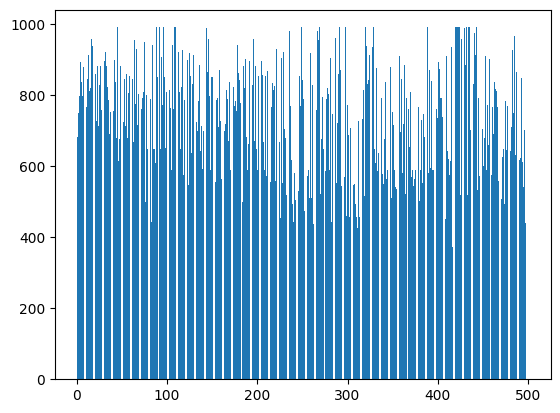

In [92]:
plt.bar(x=data4['ID'], height=data4['3st_Total_Score'])

In [ ]:
plt.bar(y=df['Col1'], width=df['Col2'])